# Decision Tree Classification with Breast Cancer Dataset

This notebook demonstrates the implementation of a Decision Tree Classifier for the Breast Cancer Wisconsin dataset. We will build a model to classify breast cancer tumors as either benign or malignant based on various features.

Accuracy: 94.73684210526315 %
Prediction for new sample: Benign


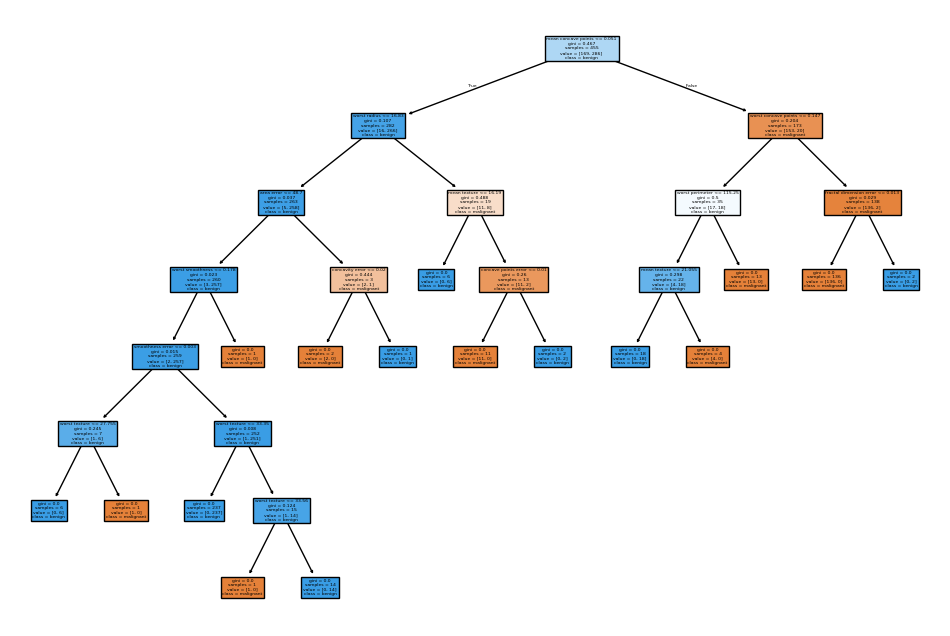

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)) * 100, "%")

sample = X_test[0].reshape(1, -1)
print("Prediction for new sample:", "Benign" if clf.predict(sample)[0] else "Malignant")

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()